In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
API_KEY = "UGRL0JOCODYNZQ8W"
ticker = "AAPL"

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={ticker}&outputsize=compact&apikey={API_KEY}'

response = requests.get(url)
data = response.json()

Last 5 days:
               Open    High     Low   Close      Volume
2026-01-05  270.640  271.51  266.14  267.26  45647190.0
2026-01-06  267.000  267.55  262.12  262.36  52352090.0
2026-01-07  263.200  263.68  259.81  260.33  48309804.0
2026-01-08  257.020  259.29  255.70  259.04  50419337.0
2026-01-09  259.075  260.21  256.22  259.37  39996967.0


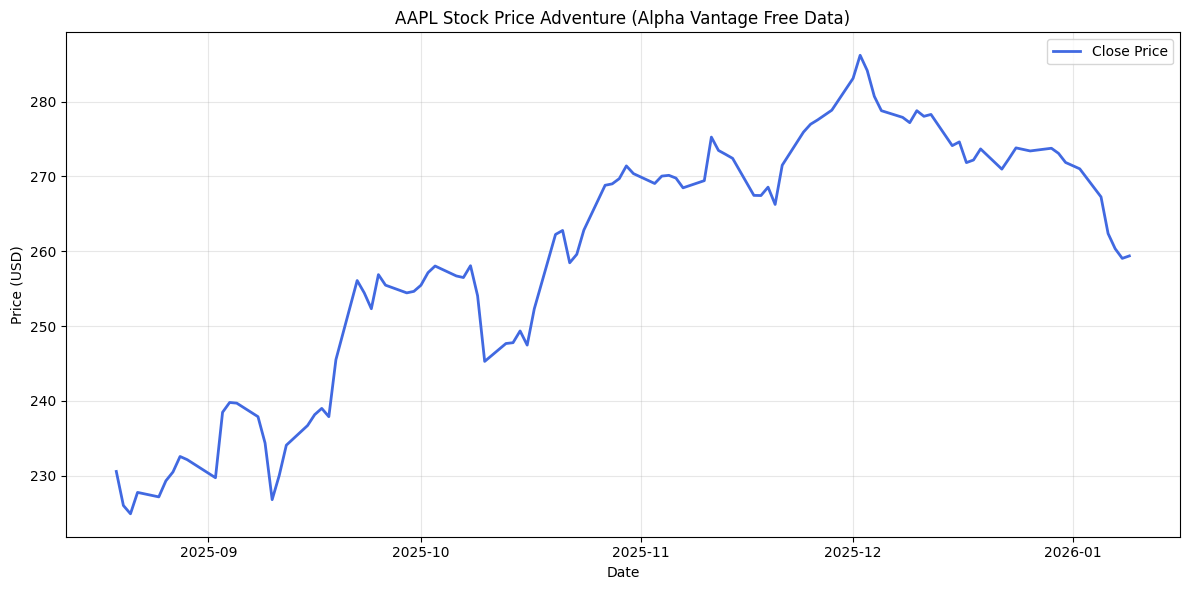

In [11]:
if 'Time Series (Daily)' in data:
    df = pd.DataFrame.from_dict(data['Time Series (Daily)'], orient='index')
    df = df.astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

    df = df.rename(columns={
        '1. open': 'Open',
        '2. high': 'High',
        '3. low': 'Low',
        '4. close': 'Close',
        '5. volume': 'Volume'
    })
    
    print("Last 5 days:")
    print(df.tail())

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], color='royalblue', linewidth=2, label='Close Price')
    plt.title(f"{ticker} Stock Price Adventure (Alpha Vantage Free Data)")
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Oops! API message:", data.get('Note', data.get('Information', 'Unknown error')))